La mortalidad materna es uno de los problemas más consistentes a lo largo de los
años, y aunque se da principalmente en países en vía de desarrollo, en los que por lo
general se tienen malas condiciones de vida, lo que implica un pésimo monitoreo a
las mujeres durante esta etapa de gestación, el problema se encuentra presente también en países desarrollados, presentando aumentos significativos en los últimos años.

Según la literatura, existen diferentes factores que influyen en el aumento de estas complicaciones, que se dan principalmente en zonas rurales, donde se tiene poco acceso a recursos y atención adecuada prenatal y obstétrica especializada, además de la escasez de centros médicos con equipamiento adecuado para afrontar este tipo de situaciones. Sumado a ello, la presencia de condiciones preexistentes en las mujeres de la población de interés, como lo son la anemia, diabetes y obesidad [9, 11].

A nivel global, ante esta problemática, los países buscan modelar esta situación con
el objetivo de predecir y manejar el riesgo del parto prematuro. El problema surge cuando se analiza la población de interés, ya que resulta complicado evaluar a estas personas debido a las complicaciones económicas que esto implica. Por lo tanto, esto conlleva a que estas regiones utilicen modelos de predicción sencillos, basados en características
rutinarias y fáciles de obtener [7]. 

Estos problemas se pueden evitar cuando, en las primeras etapas, se clasifican como
situaciones de riesgo. Entonces, el objetivo de nosotros es identificar esos factores que
pueden causar problemas en un futuro, mediante el uso de un modelo logístico, con el objetivo de tratar de resolver estos problemas comunes en zonas rurales de países en desarrollo.


In [22]:
import pandas as pd
import numpy as np
 
import openpyxl
import os

In [23]:
datos = pd.read_csv("Maternal Health Risk Data Set.csv")
datos.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [24]:

datos['RiesgoBinario'] = datos['RiskLevel'].apply(lambda x: 1 if x == "high risk" else 0)
datos.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,RiesgoBinario
0,25,130,80,15.0,98.0,86,high risk,1
1,35,140,90,13.0,98.0,70,high risk,1
2,29,90,70,8.0,100.0,80,high risk,1
3,30,140,85,7.0,98.0,70,high risk,1
4,35,120,60,6.1,98.0,76,low risk,0


In [25]:

datos.columns = ["Edad",          # Age
                 "PresionSistolica",  # SystolicBP
  "PresionDiastolica", # DiastolicBP
  "Glucosa",       # BS (Blood Sugar)
  "TemperaturaCorporal", # BodyTemp
  "FrecuenciaCardiaca",  # HeartRate
  "NivelRiesgo",    # RiskLevel
  "RiesgoBinario" ]

In [26]:
datos.columns
datos.head()
datos.describe()


,Edad,PresionSistolica,PresionDiastolica,Glucosa,TemperaturaCorporal,FrecuenciaCardiaca,RiesgoBinario
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,0.268245
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.443264
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,0.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,1.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,1.000000


In [39]:
###-----------------------------------
### Categorizar Variables predictoras 
###-----------------------------------


### Edad 
datos['EdadCat'] = pd.cut(
    datos['Edad'],
    bins=[0, 18, 45, np.inf],
    labels=["MenorEdad", "AdultoJoven", "Adulto"],
    right=False 
)

### Presión Sistólica 
datos['PresionSistolicaCat'] = pd.cut(
    datos['PresionSistolica'],
    bins=[0, 120, 140, np.inf],
    labels=["Normal", "Elevada", "Hipertension"],
    right=False 
)


In [43]:

### Presión Distólica 
datos['PresionDiastolicaCat'] = pd.cut(
    datos['PresionDiastolica'],
    bins=[0, 90, 100, np.inf],
    labels=["Normal", "Hipertension1", "Hipertension2"],
    right=False 
)


### Glucosa en sangre
datos['GlucosaCat'] = pd.cut(
    datos['Glucosa'],
    bins=[0, 7.8, 11, np.inf],
    labels=["Normal", "PreDiabetes", "Diabetes"],
    right=False 
)


### Temperatura 
datos['TemperaturaCorporalCat'] = pd.cut(
    datos['TemperaturaCorporal'],
    bins=[0, 98.6, 102, np.inf],
    labels=["Normal", "Febricula", "Fiebre"],
    right=False 
)


### Frecuencia cardiaca 
datos['FrecuenciaCardiacaCat'] = pd.cut(
    datos['FrecuenciaCardiaca'],
    bins=[0, 81, 141, np.inf],
    labels=["Normal", "Media", "Alta"],
    right=False 
)


In [45]:
datos.columns

Index(['Edad', 'PresionSistolica', 'PresionDiastolica', 'Glucosa',
       'TemperaturaCorporal', 'FrecuenciaCardiaca', 'NivelRiesgo',
       'RiesgoBinario', 'EdadCat', 'PresionSistolicaCat',
       'PresionDiastolicaCat', 'GlucosaCat', 'TemperaturaCorporalCat',
       'FrecuenciaCardiacaCat'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.stats.anova import anova_lm


#### Datos de entrenamiento y prueba (70%-30%) 
train, test = train_test_split(
    datos,
    test_size=0.3,
    stratify=datos['RiesgoBinario'],
    random_state=123 
)



In [51]:
print(train.shape, test.shape)

(709, 14) (305, 14)


Ajustamos el modelo utilizando la variables seleccionadas 

In [55]:

modelo = smf.glm(
    formula="RiesgoBinario ~ EdadCat + PresionSistolicaCat + PresionDiastolicaCat + GlucosaCat + TemperaturaCorporalCat",
    data=train,
    family=sm.families.Binomial()
).fit()


In [59]:
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          RiesgoBinario   No. Observations:                  709
Model:                            GLM   Df Residuals:                      698
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -162.08
Date:                Sat, 21 Jun 2025   Deviance:                       324.15
Time:                        23:28:11   Pearson chi2:                     754.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5060
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [69]:
modelo.params.apply(np.exp) ### ODDS

Intercept                                  0.020856
EdadCat[T.AdultoJoven]                     1.151110
EdadCat[T.Adulto]                          0.285281
PresionSistolicaCat[T.Elevada]             0.603423
PresionSistolicaCat[T.Hipertension]      281.056806
PresionDiastolicaCat[T.Hipertension1]      1.018697
PresionDiastolicaCat[T.Hipertension2]      2.090434
GlucosaCat[T.PreDiabetes]                  4.901853
GlucosaCat[T.Diabetes]                   304.711991
TemperaturaCorporalCat[T.Febricula]        7.387856
TemperaturaCorporalCat[T.Fiebre]          18.209237
dtype: float64

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

def hosmer_lemeshow_test(y_true, y_prob, g=10):
    data = pd.DataFrame({'y': y_true, 'p': y_prob})
    data['grupo'] = pd.qcut(data['p'], q=g, duplicates='drop')
    resumen = data.groupby('grupo').agg(
        eventos=('y', 'sum'),
        total=('y', 'count'),
        p_media=('p', 'mean')
    )
    resumen['no_eventos'] = resumen['total'] - resumen['eventos']
    resumen['esperado_eventos'] = resumen['total'] * resumen['p_media']
    resumen['esperado_no_eventos'] = resumen['total'] * (1 - resumen['p_media'])

    hl_stat = (
        (resumen['eventos'] - resumen['esperado_eventos'])**2 / resumen['esperado_eventos'] +
        (resumen['no_eventos'] - resumen['esperado_no_eventos'])**2 / resumen['esperado_no_eventos']
    ).sum()

    gl = g - 2
    p_value = chi2.sf(hl_stat, gl)

    return hl_stat, p_value


In [73]:
prob_train = modelo.predict()
y_train = train['RiesgoBinario']
hl_stat, p_val = hosmer_lemeshow_test(y_train, prob_train, g=10)

print(f'Estadístico HL: {hl_stat:.3f}, p-valor: {p_val:.4f}')


Estadístico HL: 7.747, p-valor: 0.4585


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14868\1221743071.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = data.groupby('grupo').agg(


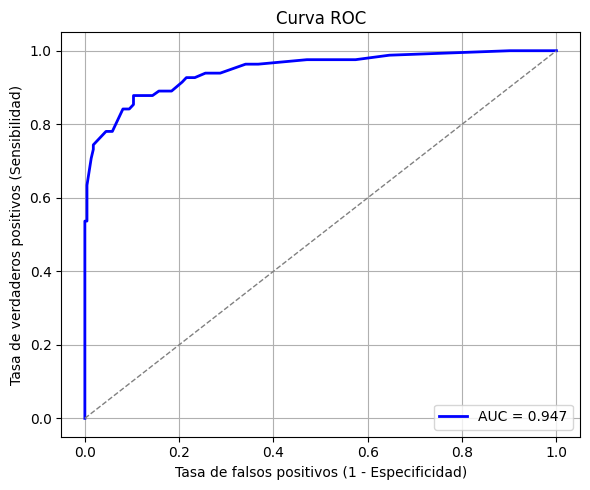

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

### 1. Obtener probabilidades del modelo en el conjunto de prueba
prob_test = modelo.predict(test)

# 2. Valores verdaderos
y_test = test['RiesgoBinario']

# 3. Curva ROC: obtener FPR, TPR
fpr, tpr, thresholds = roc_curve(y_test, prob_test)

# 4. AUC
auc = roc_auc_score(y_test, prob_test)

# 5. Graficar la curva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel("Tasa de falsos positivos (1 - Especificidad)")
plt.ylabel("Tasa de verdaderos positivos (Sensibilidad)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [75]:
### Predicciones y valores reales
df = pd.DataFrame({
    'prob': prob_test,
    'real': test['RiesgoBinario']
})

df['grupo'] = pd.qcut(df['prob'], q=10, labels=False, duplicates='drop')
df_plot = df.groupby('grupo').agg(
    probs_medias=('prob', 'mean'),
    prop_observada=('real', 'mean')
).reset_index()

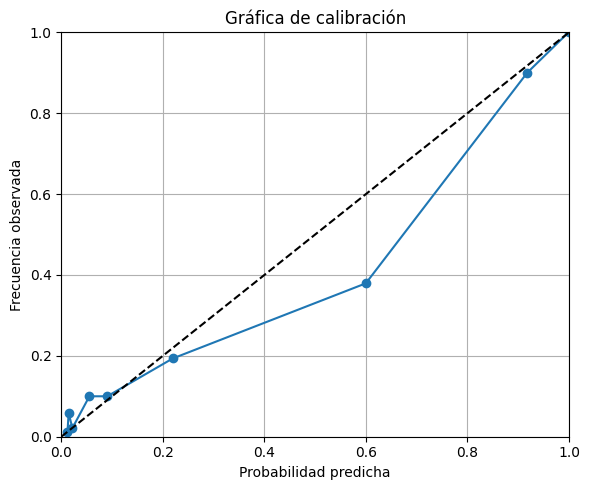

In [ ]:

plt.figure(figsize=(6, 5))
plt.plot(df_plot['probs_medias'], df_plot['prop_observada'], marker='o', linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')  

plt.xlabel("Probabilidad predicha")
plt.ylabel("Frecuencia observada")
plt.title("Gráfica de calibración")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


Por último, se es necesario verificar la eficiencia del modelo mediante las metricas de desempeño y la matriz de confución  

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

clase_test = (prob_test >= 0.5).astype(int)
y_real = test['RiesgoBinario']


In [ ]:
confusion_matrix(y_real, clase_test, labels=[0, 1])


array([[205,  18],
       [ 13,  69]])

In [81]:
print("\nReporte de clasificación:")
print(classification_report(y_real, clase_test, digits=3))



Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.940     0.919     0.930       223
           1      0.793     0.841     0.817        82

    accuracy                          0.898       305
   macro avg      0.867     0.880     0.873       305
weighted avg      0.901     0.898     0.899       305

